##  Red Wine Quality Prediction

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

#### Importing all necessary libraries

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import joblib
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


#### Loading the dataset

In [79]:
df=pd.read_csv('winequality-red.csv')

In [80]:
pd.pandas.set_option('display.max_columns',None)

In [81]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [82]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [84]:

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no null value present in the dastaset

In [85]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

There is 6 types of quality is present

In [86]:

df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


#### Data Analysis

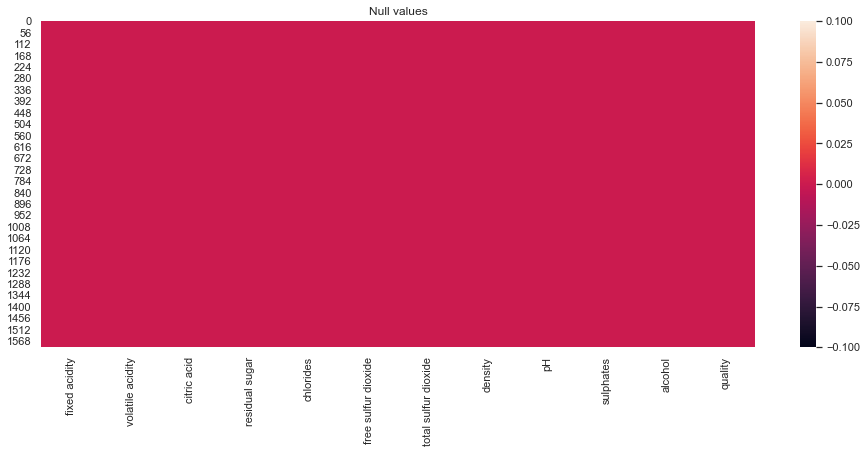

In [87]:
#to check missing values
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

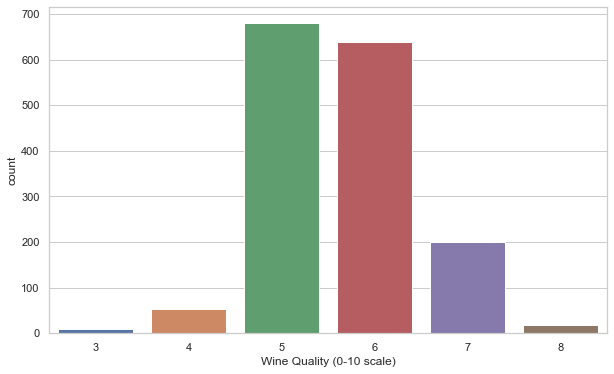

In [88]:

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.countplot(x="quality", data=df)
plt.xlabel("Wine Quality (0-10 scale)")
plt.show()

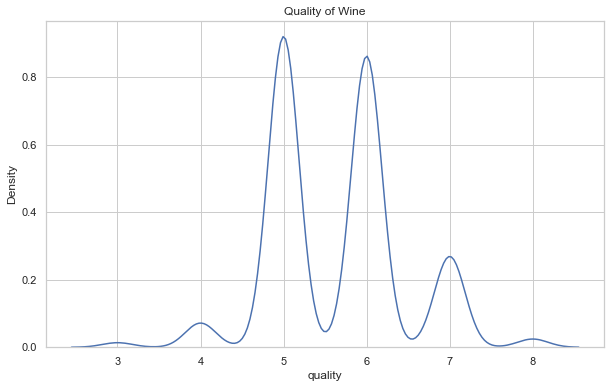

In [89]:
plt.figure(figsize=(10,6))
sns.kdeplot(df.query('quality > 2').quality)
plt.title('Quality of Wine')
plt.show()

Quality of Wine whicg is greater than 2 as we can see the quality with 5 and 6 are very high

In [90]:
c=df.columns.drop(['quality'])

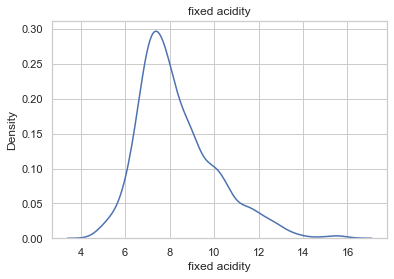

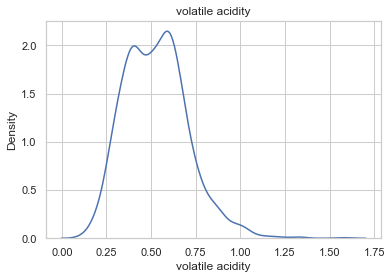

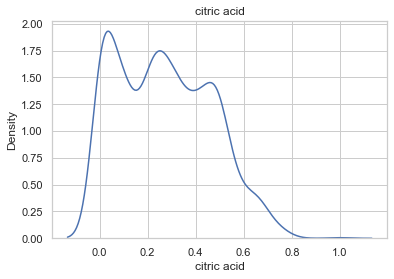

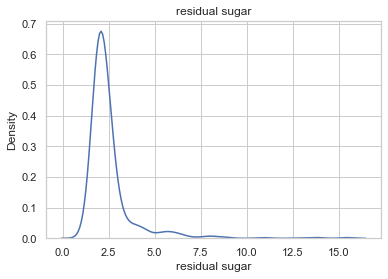

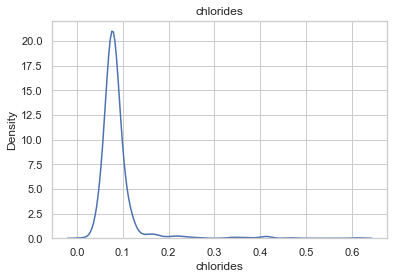

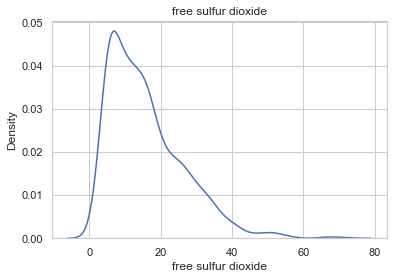

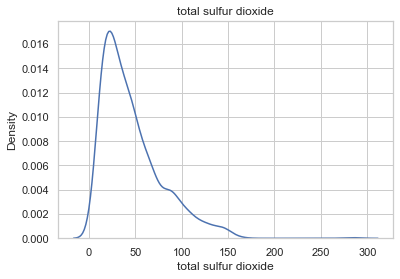

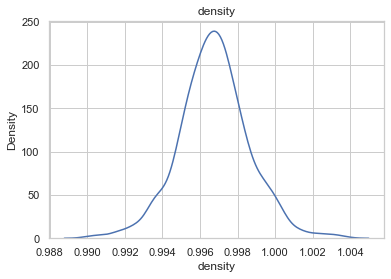

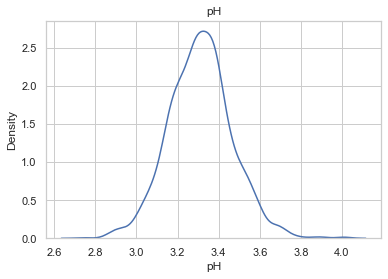

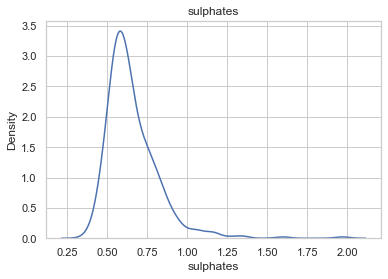

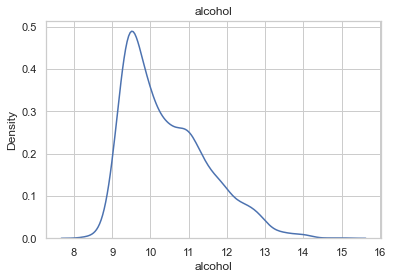

In [91]:
for i in c:
    sns.kdeplot(df[i])
    plt.title(i)
    plt.show()

Checking the density of all columns

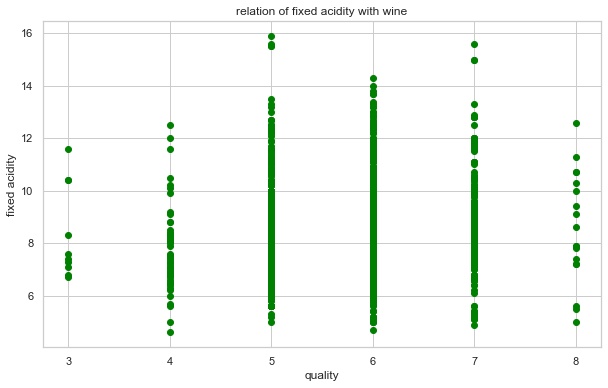

In [92]:

plt.figure(figsize=(10,6))
plt.scatter(df['quality'], df['fixed acidity'], color = 'green')
plt.title('relation of fixed acidity with wine')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.show()


 checking the variation of fixed acidity in the different qualities of wine

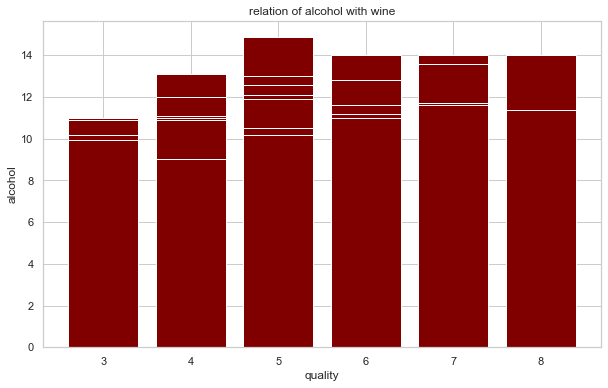

In [93]:

plt.figure(figsize=(10,6))
plt.bar(df['quality'], df['alcohol'], color = 'maroon')
plt.title('relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

checking the variation of fixed acidity in the different qualities of wine

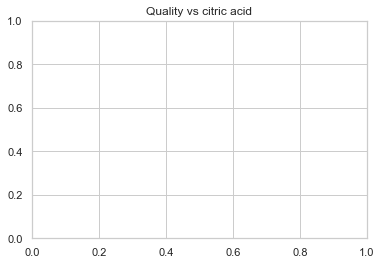

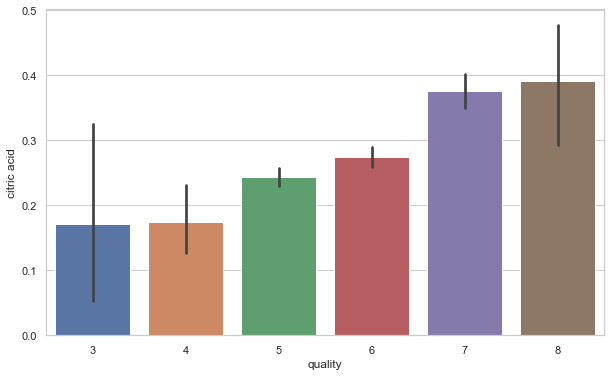

In [94]:
 plt.title('Quality vs citric acid')

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)
plt.show()

Composition of citric acid go higher as we go higher in the quality of the wine

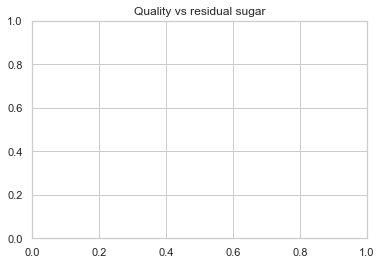

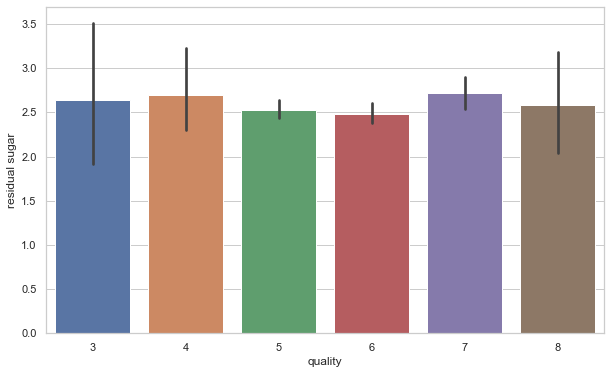

In [95]:
 plt.title('Quality vs residual sugar')

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)
plt.show()

Composition of residual sugar is almost same for all as we go higher in the quality of the wine

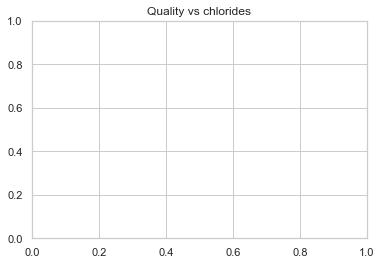

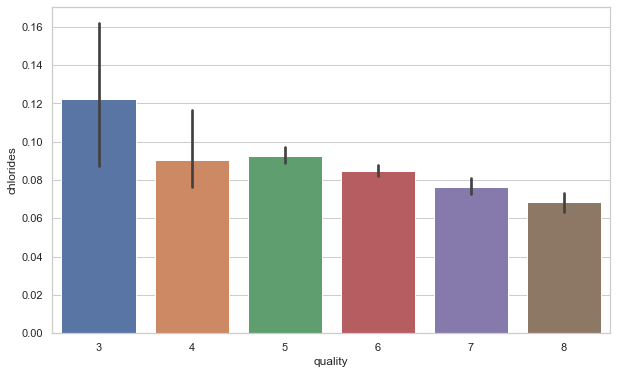

In [96]:
plt.title('Quality vs chlorides')

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)
plt.show()

Composition of chloride also go down as we go higher in the quality of the wine

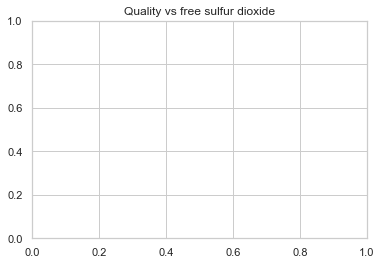

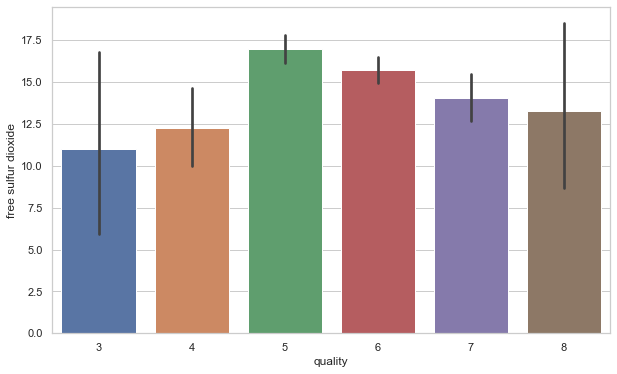

In [97]:
plt.title('Quality vs free sulfur dioxide')

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)
plt.show()

Composition of free sulfur dioxide is high for the quality 5 and less for quality 3 wine 

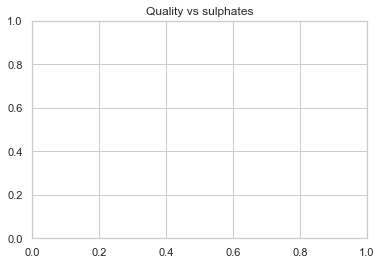

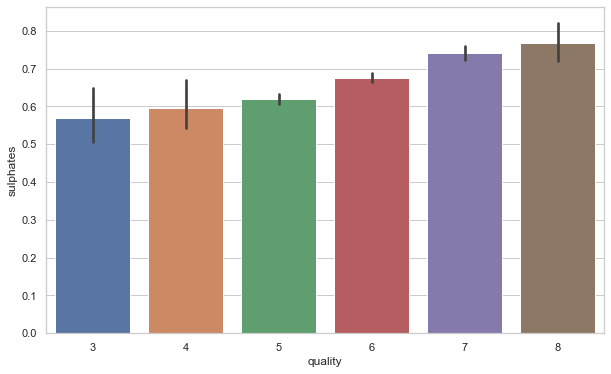

In [98]:
plt.title('Quality vs sulphates')

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)
plt.show()

Sulphates level goes higher with the quality of wine

As we can see that like the above two items do not have very strong relation to the dependent variable we have to showcase a correlation plot to check which of the items are more related to the dependent variable and which items are less related to the dependent variables.

In [99]:

df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


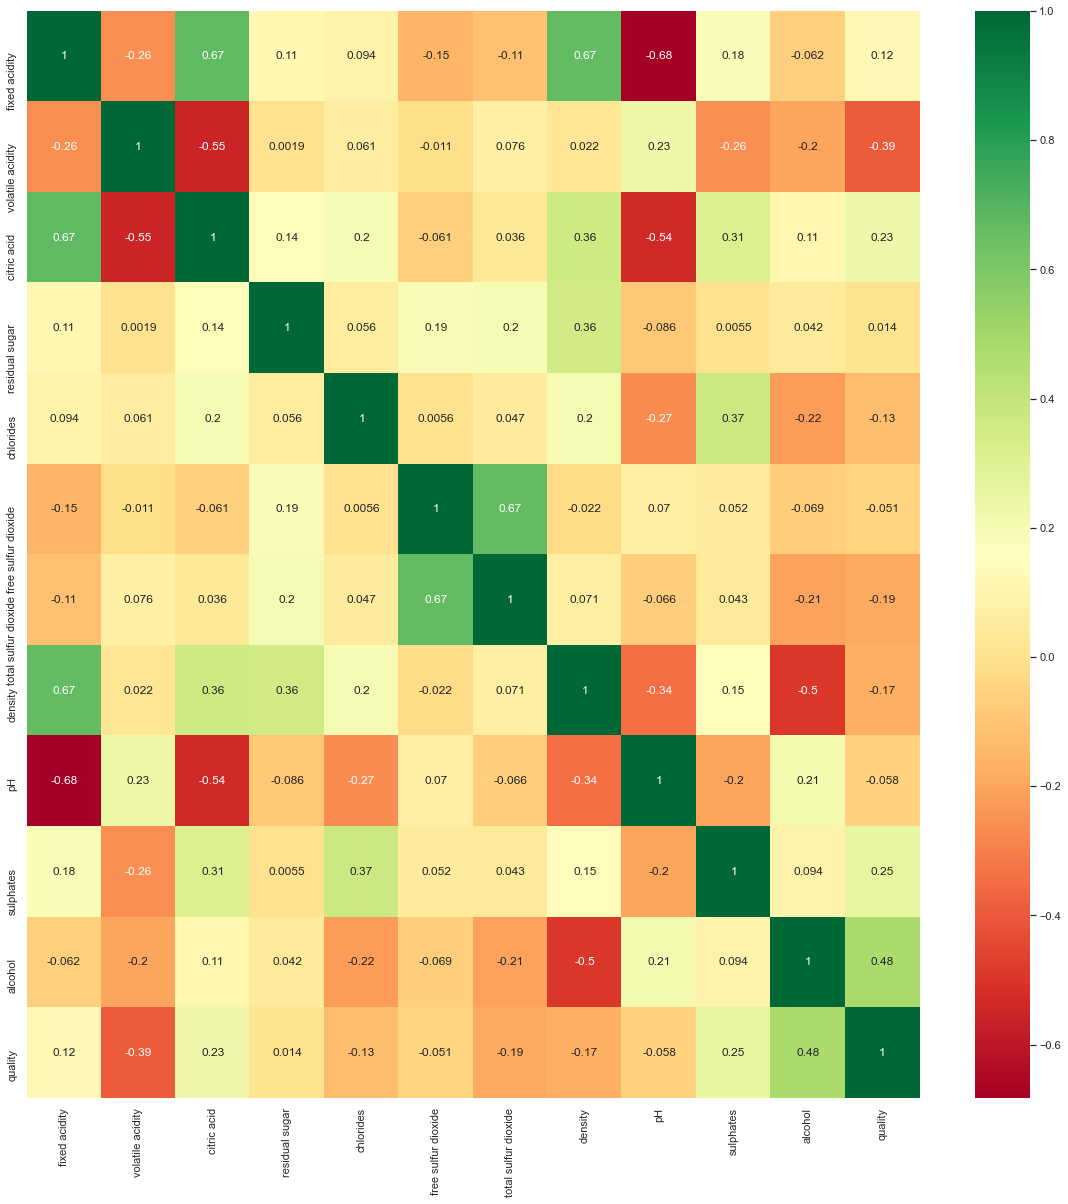

In [100]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

 From the above correlation plot for the given dataset for wine quality prediction, we can easily see which items are related strongly with each other and which items are related weekly with each other. For Example,

## The strongly correlated items are : 

1.fixed acidity and citric acid. 2.free sulphur dioxide and total sulphor dioxide. 3.fixed acidity and density.

1.alcohol and quality.

so, from above points there is a clear inference that alcohol is the most important characteristic to determine the quality of wine

## The weakly correlated items are :

1.citric acid and volatile acidity.

2.fixed acidity and ph.

3.density and alcohol.

These are some relations which do not depend on each other at all

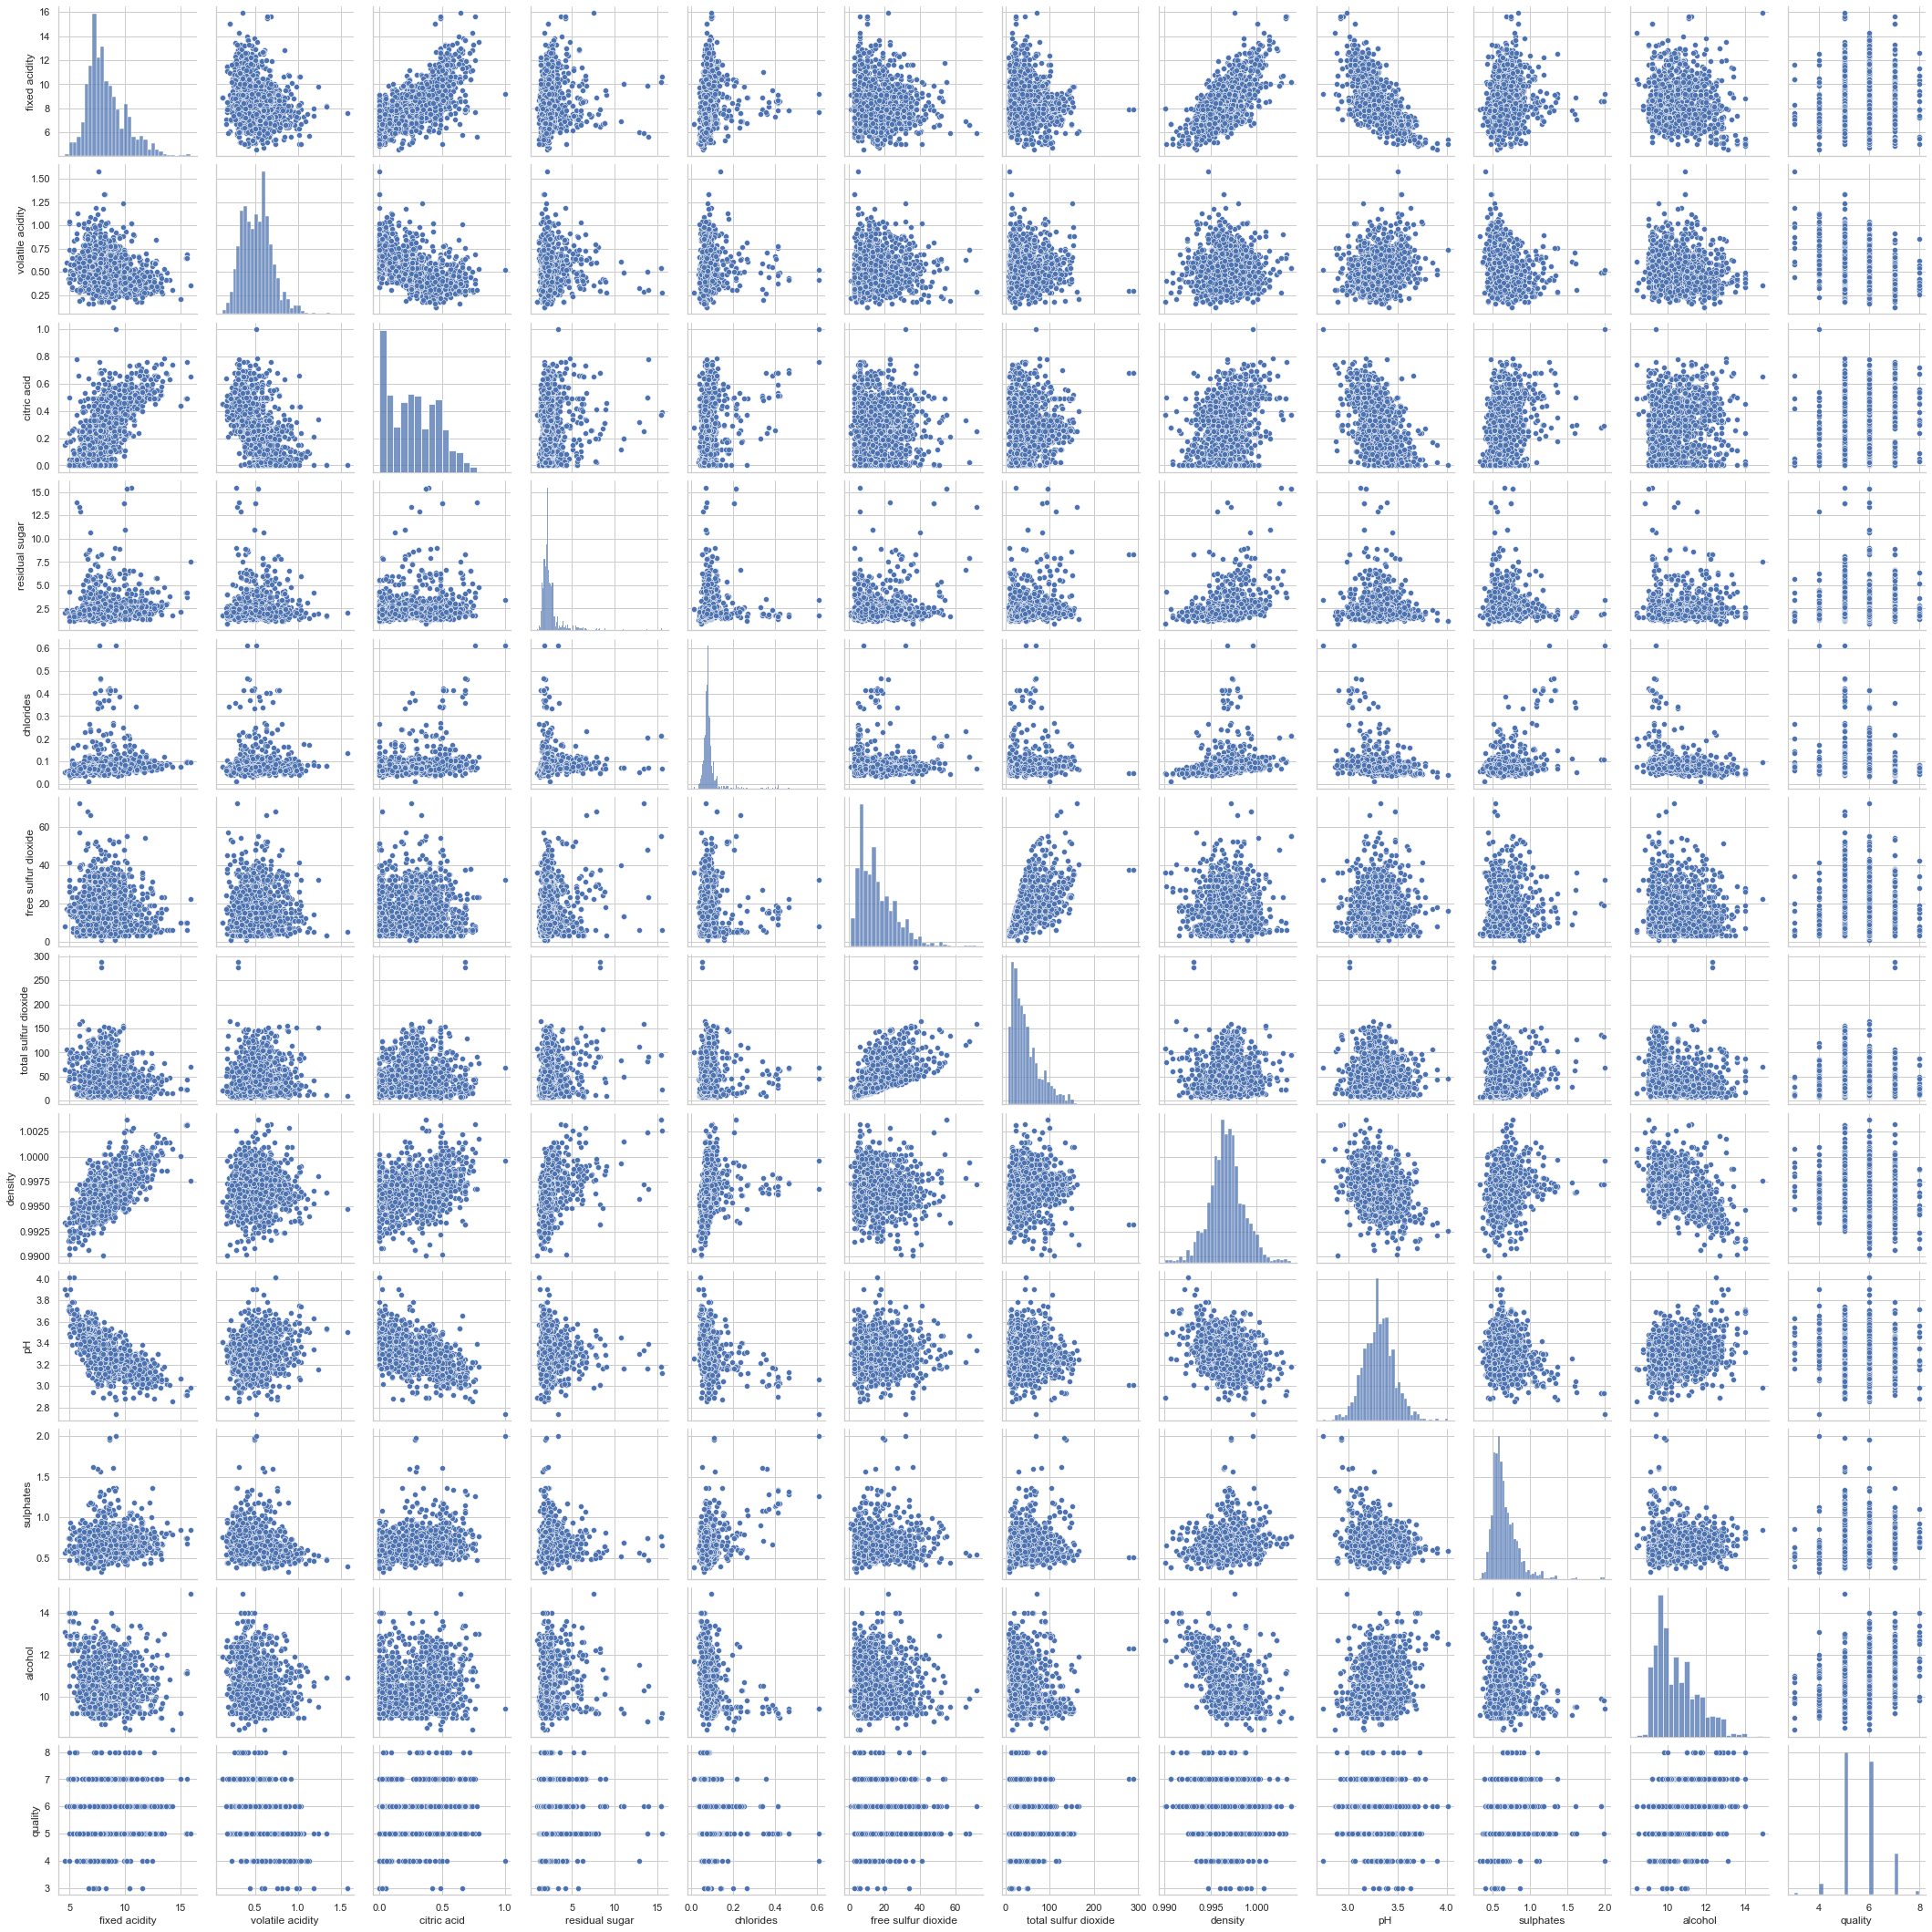

In [101]:
sns.pairplot(df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

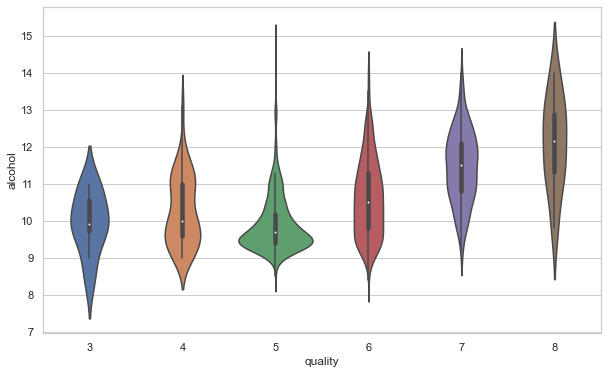

In [102]:
fig = plt.figure(figsize = (10,6))
sns.violinplot(x='quality', y='alcohol', data=df)

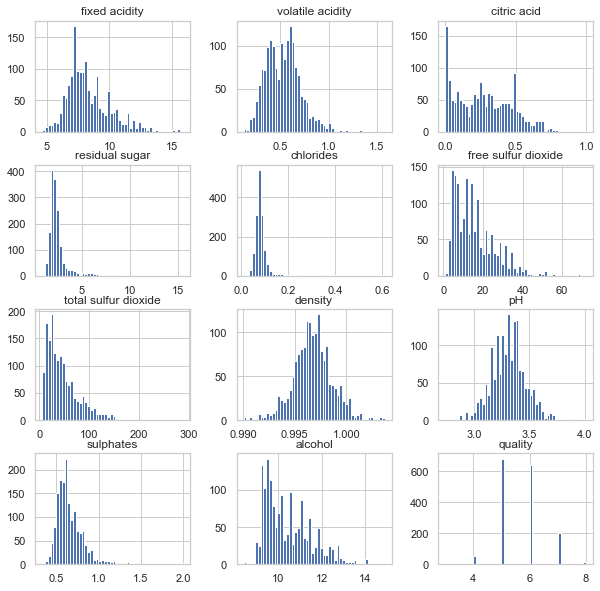

In [103]:
df.hist(figsize=(10,10),bins=50)
plt.show()

### Data Featuring

Checking outliers

In [104]:
c=df.columns.drop('quality')

In [105]:
list(enumerate(c))

[(0, 'fixed acidity'),
 (1, 'volatile acidity'),
 (2, 'citric acid'),
 (3, 'residual sugar'),
 (4, 'chlorides'),
 (5, 'free sulfur dioxide'),
 (6, 'total sulfur dioxide'),
 (7, 'density'),
 (8, 'pH'),
 (9, 'sulphates'),
 (10, 'alcohol')]

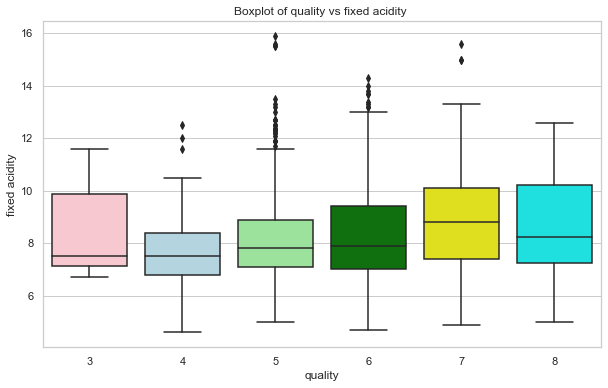

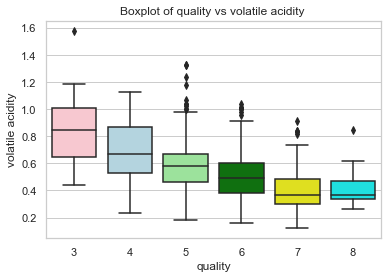

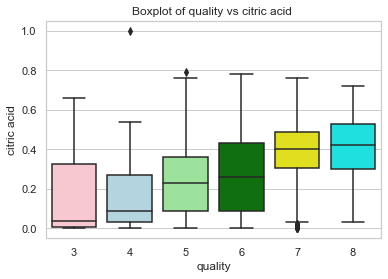

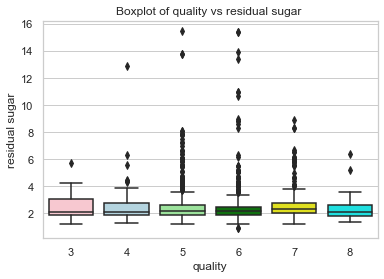

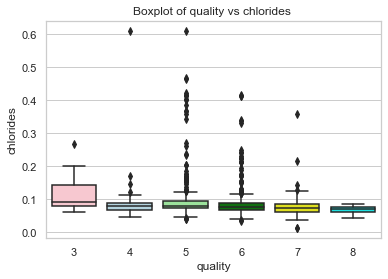

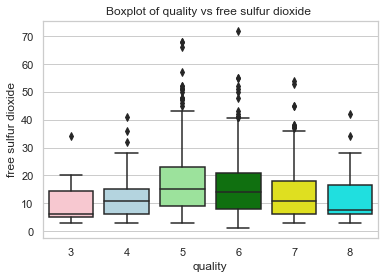

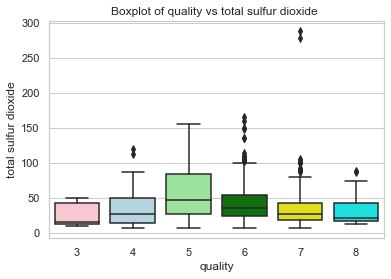

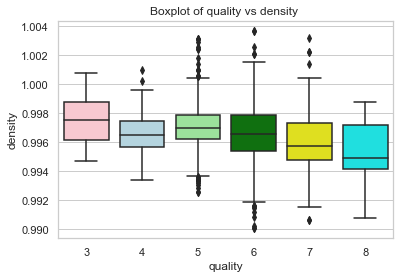

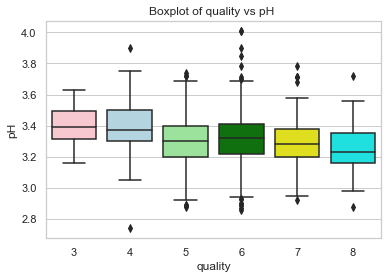

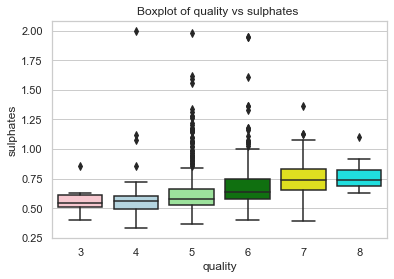

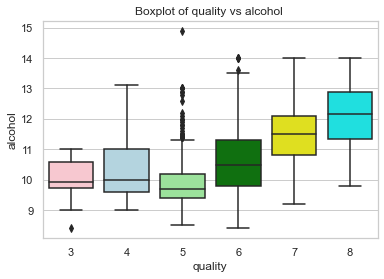

In [106]:
plt.figure(figsize=(10,6))
colors = ['pink', 'lightblue', 'lightgreen','green','yellow','aqua']
for i in c:
    sns.boxplot(x=df['quality'],y=df[i],palette =colors)
    plt.title(f"Boxplot of quality vs {i} ")
    plt.show()

### Removing outliers

In [107]:
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [108]:
new_df.shape

(1451, 12)

In [109]:
df.shape

(1599, 12)

In [110]:
df=new_df

### Data pre-processing

In [111]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [112]:
# converting the response variables(3-7) as binary response variables that is either good or bad

df['quality'] = [1 if x >= 7 else 0 for x in df['quality']]# Separate feature variables and target variable
x = df.drop(['quality','quality'], axis = 1)
y = df['quality']

In [113]:
# analyzing the different values present in the dependent variable(quality column)
df['quality'].value_counts()

0    1250
1     201
Name: quality, dtype: int64

In [114]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['quality'] = le.fit_transform(df['quality'])

df['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1451, dtype: int64>

<AxesSubplot:xlabel='quality', ylabel='count'>

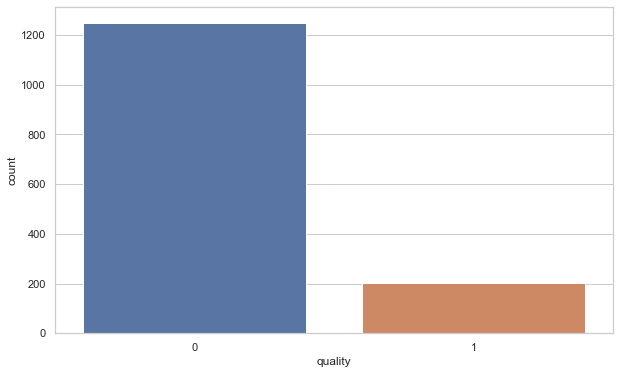

In [115]:
fig = plt.figure(figsize = (10,6))
sns.countplot(df['quality'])

This graph tells about the quality quantity as 0 is way more than 1

### Feature Selection

In [116]:
# Create Classification version of target variable
x = df.drop(['quality'], axis = 1)
y = df['quality']

In [117]:
# See proportion of good vs bad wines
df['quality'].value_counts()

0    1250
1     201
Name: quality, dtype: int64

In [118]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [119]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1451, dtype: int64


### Feature Importance

In [120]:

model = LogisticRegression()

from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(x,y)
score = classifiern.feature_importances_
print(score)

[0.07297217 0.10224957 0.09855881 0.07778467 0.06773092 0.06451998
 0.07448499 0.08582074 0.06521762 0.12096585 0.16969469]


### Splitting Dataset

In [121]:
# dividing the dataset into dependent and independent variables

x = df.iloc[:,:11]
y = df.iloc[:,11]

# determining the shape of x and y.
print(x.shape)
print(y.shape)

(1451, 11)
(1451,)


In [122]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=7)

In [123]:
# determining the shapes of training and testing sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1015, 11)
(1015,)
(436, 11)
(436,)


In [124]:
#standard scaling 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

### LogisticRegression :

In [125]:
model = LogisticRegression()
model.fit(x_train,y_train)
pred_y = model.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,pred_y))
# classification report
print(classification_report(y_test, pred_y))

Accuracy Score: 0.8922018348623854
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       379
           1       0.62      0.44      0.52        57

    accuracy                           0.89       436
   macro avg       0.77      0.70      0.73       436
weighted avg       0.88      0.89      0.88       436



(2.0, -0.1)

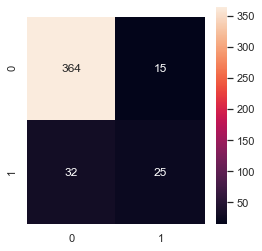

In [126]:
cmlg = confusion_matrix(y_test, pred_y)
_,ax = plt.subplots(figsize=(4,4))
sns.heatmap(cmlg,annot=True,fmt="d")
ax.set_ylim(2,-0.1)

In [127]:
#Now lets try to do some evaluation for Logistic Regression using cross validation.

model_eval = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
model_eval.mean()

0.8828091632692681

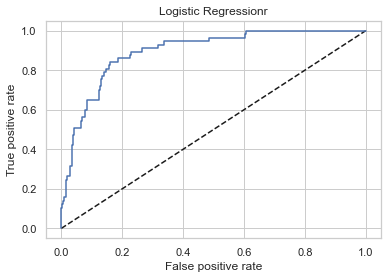

0.6995093274082304

In [128]:
#Logistic Regression Curve

y_pred_prob = model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regressionr')
plt.show()
auc_score=roc_auc_score(y_test,model.predict(x_test))
auc_score

### Using KNN:

In [129]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
pred_y = model.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,pred_y))
# classification report
print(classification_report(y_test, pred_y))

Accuracy Score: 0.9059633027522935
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       379
           1       0.67      0.56      0.61        57

    accuracy                           0.91       436
   macro avg       0.80      0.76      0.78       436
weighted avg       0.90      0.91      0.90       436



(2.0, -0.1)

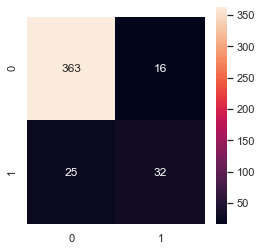

In [130]:
knncm = confusion_matrix(y_test, pred_y)
_,ax = plt.subplots(figsize=(4,4))
sns.heatmap(knncm,annot=True,fmt="d")
ax.set_ylim(2,-0.1)

In [131]:
#Now lets try to do some evaluation for KNeighborsClassifier using cross validation.

model_eval = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
model_eval.mean()

0.8709668025626092

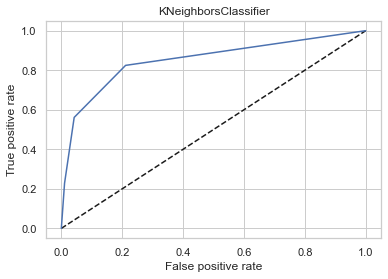

0.7595935749664399

In [132]:
#KNeighborsClassifier Curve

y_pred_prob = model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()
auc_score=roc_auc_score(y_test,model.predict(x_test))
auc_score

### RandomForestClassifier :

In [133]:
# creating the model
model = RandomForestClassifier(n_estimators = 200)

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the accuracy
print("Accuracy Score:",accuracy_score(y_test,y_pred))
# classification report
print(classification_report(y_test, pred_y))

Accuracy Score: 0.9174311926605505
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       379
           1       0.67      0.56      0.61        57

    accuracy                           0.91       436
   macro avg       0.80      0.76      0.78       436
weighted avg       0.90      0.91      0.90       436



(2.0, -0.1)

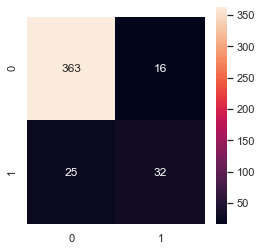

In [134]:
cmrf = confusion_matrix(y_test, pred_y)
_,ax = plt.subplots(figsize=(4,4))
sns.heatmap(cmrf,annot=True,fmt="d")
ax.set_ylim(2,-0.1)

In [135]:
#Now lets try to do some evaluation for RandomForestClassifier using cross validation.

model_eval = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
model_eval.mean()

0.8936711318190644

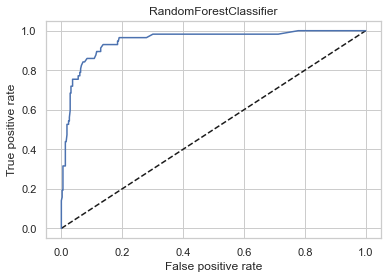

0.7587372124242003

In [136]:
#RandomForest Curve

y_pred_prob = model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()
auc_score=roc_auc_score(y_test,model.predict(x_test))
auc_score

### DecisionTreeClassifier

Accuracy Score: 0.8830275229357798
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       379
           1       0.67      0.56      0.61        57

    accuracy                           0.91       436
   macro avg       0.80      0.76      0.78       436
weighted avg       0.90      0.91      0.90       436



(2.0, -0.1)

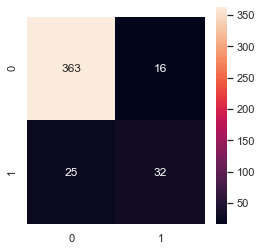

In [137]:
# creating the model
model = DecisionTreeClassifier(criterion='entropy',random_state=7)

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the accuracy
print("Accuracy Score:",accuracy_score(y_test,y_pred))
# classification report
print(classification_report(y_test, pred_y))
#CONFUSION MATRIX
cmdt = confusion_matrix(y_test, pred_y)
_,ax = plt.subplots(figsize=(4,4))
sns.heatmap(cmdt,annot=True,fmt="d")
ax.set_ylim(2,-0.1)

In [138]:
#Now lets try to do some evaluation for DecisionTreeClassifier using cross validation.

model_eval = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
model_eval.mean()

0.8611240535818288

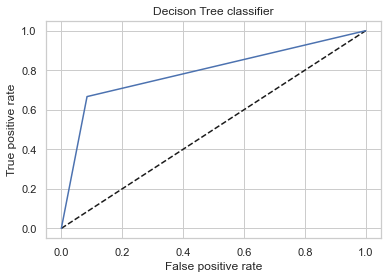

0.7911169744942831

In [139]:
#Decision Tree Curve

y_pred_prob = model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decison Tree classifier')
plt.show()
auc_score=roc_auc_score(y_test,model.predict(x_test))
auc_score

### Using GaussianNB: 

In [140]:
# creating the model
model = GaussianNB()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the accuracy
print("Accuracy Score:",accuracy_score(y_test,y_pred))
# classification report
print(classification_report(y_test, pred_y))

Accuracy Score: 0.8555045871559633
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       379
           1       0.67      0.56      0.61        57

    accuracy                           0.91       436
   macro avg       0.80      0.76      0.78       436
weighted avg       0.90      0.91      0.90       436



(2.0, -0.1)

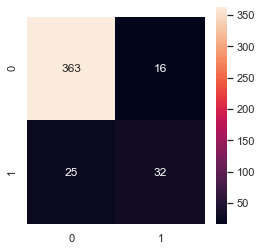

In [141]:
cmgb= confusion_matrix(y_test, pred_y)
_,ax = plt.subplots(figsize=(4,4))
sns.heatmap(cmdt,annot=True,fmt="d")
ax.set_ylim(2,-0.1)

In [142]:
#Now lets try to do some evaluation for GaussianNB using cross validation.

model_eval = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
model_eval.mean()

0.8522034556396816

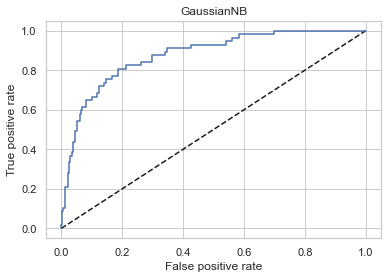

0.7827385085404804

In [143]:
#GaussianNB CURVE

y_pred_prob = model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GaussianNB')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GaussianNB')
plt.show()
auc_score=roc_auc_score(y_test,model.predict(x_test))
auc_score

#### Observation 

DecisionTreeClassifier has the highest aucroc score of 0.7911, which is highest among the all.So we chose this model for hypertuning and prediction

### Hyperparameter Tuning

In [144]:
from sklearn.model_selection import GridSearchCV

In [145]:
dtc=DecisionTreeClassifier()

In [146]:
param_dict={
    "criterion":['gini','entropy'],
    "splitter":['best', 'random'], 
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)}

In [147]:
grid=GridSearchCV(dtc,param_grid=param_dict,cv=10,verbose=1,n_jobs=-1)

In [148]:
grid.fit(x_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [149]:
grid.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 2,
 'min_samples_split': 9,
 'splitter': 'best'}

In [150]:
grid.best_estimator_

DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=9)

In [151]:
grid.best_score_

0.8798971073577947

In [152]:
mod=DecisionTreeClassifier(criterion= 'gini',min_samples_leaf= 4,min_samples_split= 4,splitter= 'best')

In [153]:
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(mod.score(x_train,y_train))

0.9507389162561576


### Saving the model

In [154]:
#saving the model
model=joblib.dump(mod,'dtcmodel.obj')